In [2]:
#imports
#pandas
import pandas as pd
from pandas import Series,DataFrame

In [3]:
import os
os.getcwd()
os.chdir("C:\\Users\\imtiaz.a.khan\\KagglePythonPractice")

In [41]:
#libraries 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("whitegrid")
%matplotlib inline

In [5]:
#importing Machine Learning Models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC,LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

In [6]:
# get titanic & test csv files as a DataFrame
train_df=pd.read_csv("train.csv",dtype={"Age":np.float64},)
test_df=pd.read_csv("test.csv",dtype={"Age":np.float64},)

In [7]:
#preview of the data
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
#information about the test and train data sets
train_df.info()
print("------------------------------")
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fa

In [9]:
#dropping unnecessary columns which would not be useful for analysis.
train_df=train_df.drop(["PassengerId","Name","Ticket"],axis=1)
test_df=test_df.drop(["Name","Ticket"],axis=1)

In [10]:
#Describing the dataset , Finding out the most repeated value
train_df.head()
train_df["Embarked"].describe()

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

In [11]:
#most embarked class is S so replacing the na values with that.
train_df["Embarked"]=train_df["Embarked"].fillna("S")

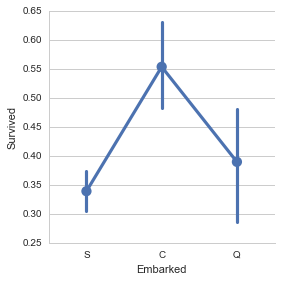

In [12]:
sns.factorplot("Embarked","Survived",data=train_df)

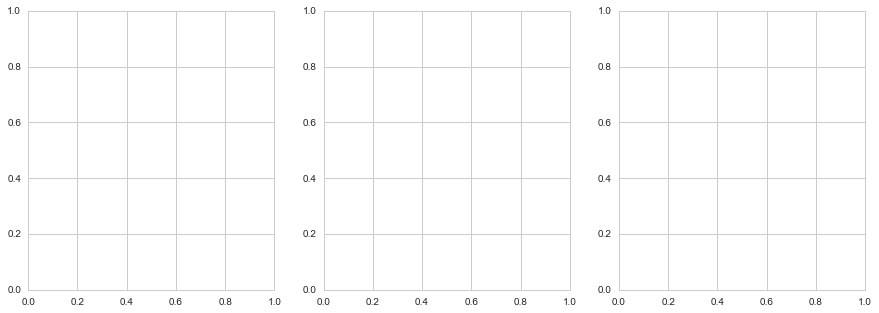

In [13]:
fig, (axis1,axis2,axis3) = plt.subplots(1,3,figsize=(15,5))

In [14]:
sns.countplot(x="Embarked",data=train_df,ax=axis1)

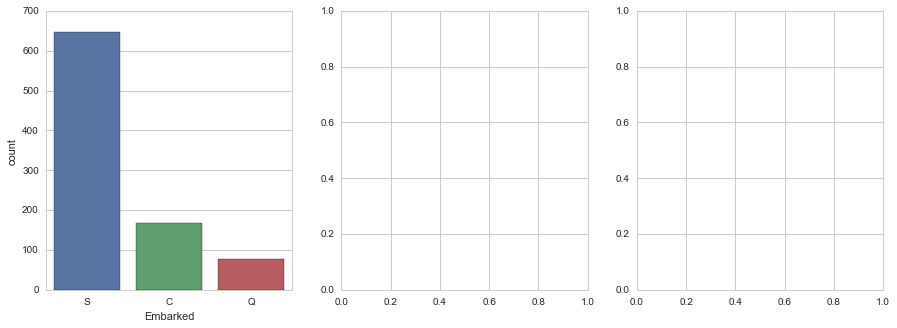

In [15]:
fig

In [16]:
sns.countplot(x="Survived",hue="Embarked",order=[1,0],data=train_df,ax=axis2)

In [17]:
embark_perc=train_df[["Embarked","Survived"]].groupby(["Embarked"],as_index=False).mean()

In [18]:
sns.barplot(x="Embarked",y="Survived",data=embark_perc,order=["S","C","Q"],ax=axis3)

In [19]:
embark_train_dummies=pd.get_dummies(train_df["Embarked"])

In [20]:
embark_train_dummies.head()

,C,Q,S
0,0.0,0.0,1.0
1,1.0,0.0,0.0
2,0.0,0.0,1.0
3,0.0,0.0,1.0
4,0.0,0.0,1.0


In [21]:
train_df["Embarked"].head()

0    S
1    C
2    S
3    S
4    S
Name: Embarked, dtype: object

In [22]:
#inplace =true means you dont have to reassign 
#the changes again to embark_train_dummies , it takes place on the actual data frame.
embark_train_dummies.drop("S",axis=1,inplace=True)

In [23]:
embark_test_dummies=pd.get_dummies(test_df["Embarked"])

In [24]:
embark_test_dummies.drop("S",axis=1,inplace=True)

In [25]:
train_df=train_df.join(embark_train_dummies)
test_df=test_df.join(embark_test_dummies)

In [26]:
train_df.drop("Embarked",axis=1,inplace=True)
test_df.drop("Embarked",axis=1,inplace=True)

In [27]:
#Missing fare values in Test data
test_df["Fare"].fillna(test_df["Fare"].median(),inplace=True)

In [28]:
#convert to int for fare in train and test

train_df["Fare"]=train_df["Fare"].astype(int)
test_df["Fare"]=test_df["Fare"].astype(int)

In [29]:
#fare for which people not survived and fare for which people survived

fare_not_survived=train_df["Fare"][train_df["Survived"]==0]
fare_survived=train_df["Fare"][train_df["Survived"]==1]

In [30]:
average_fare=DataFrame([fare_not_survived.mean(),fare_survived.mean()])
std_fare=DataFrame([fare_not_survived.std(),fare_survived.std()])

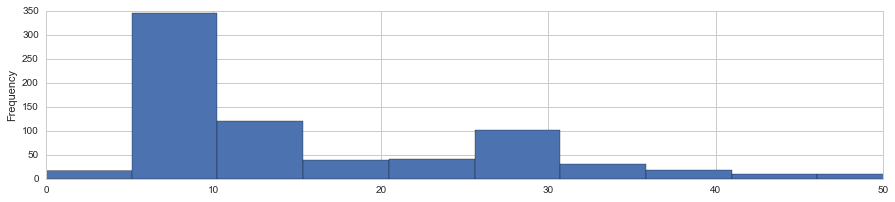

In [31]:
train_df["Fare"].plot(kind="hist",figsize=(15,3),xlim=(0,50),bins=100)

In [32]:
average_fare.index.names=std_fare.index.names=["Survived"]

In [33]:
average_fare
std_fare

,0
Survived,
0,31.392191
1,66.608344


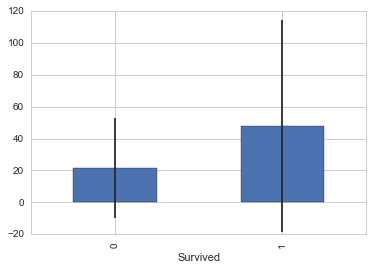

In [34]:
average_fare.plot(yerr=std_fare,kind="bar",legend=False)

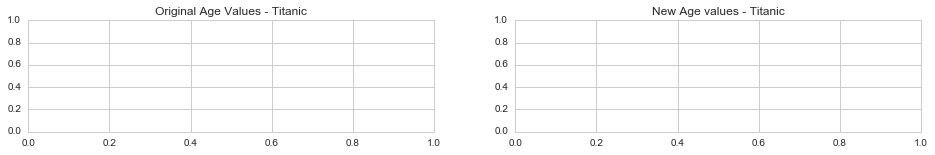

In [85]:
#Age
fig,(axis4,axis5)=plt.subplots(1,2,figsize=(16,2))
axis4.set_title("Original Age Values - Titanic")
axis5.set_title("New Age values - Titanic")
average_age_titanic=train_df["Age"].mean()
std_age_titanic=train_df["Age"].std()
count_nan_age_titanic=train_df["Age"].isnull().sum()
average_age_test   = test_df["Age"].mean()
std_age_test       = test_df["Age"].std()
count_nan_age_test = test_df["Age"].isnull().sum()

In [46]:
# generate random numbers between (mean - std) & (mean + std)
rand1=np.random.randint(average_age_titanic-std_age_titanic,average_age_titanic+std_age_titanic,size=count_nan_age_titanic)
rand2=np.random.randint(average_age_test-std_age_test,average_age_test+std_age_test,size=count_nan_age_test)

In [113]:
test_df["Age"][np.isnan(test_df["Age"])] = rand2
test_df['Age'] = test_df['Age'].astype(int)

C:\Users\imtiaz.a.khan\AppData\Local\Enthought\Canopy\User\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


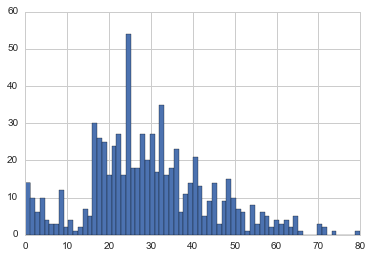

In [52]:
train_df['Age'].dropna().astype(int).hist(bins=70)

C:\Users\imtiaz.a.khan\AppData\Local\Enthought\Canopy\User\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


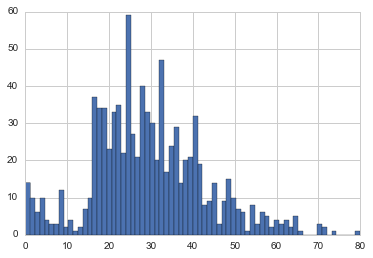

In [90]:
train_df["Age"][np.isnan(train_df["Age"])] = rand1
train_df['Age'].dropna().astype(int).hist(bins=70)

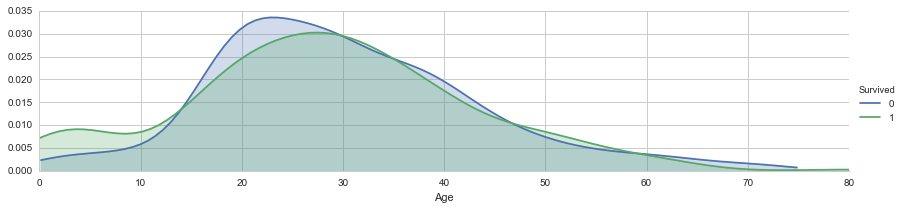

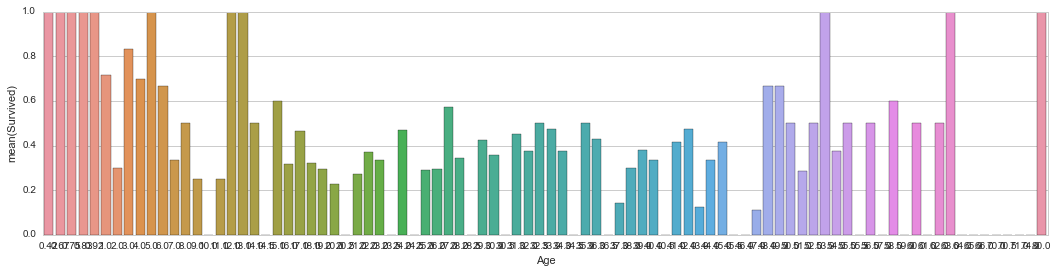

In [94]:
# .... continue with plot Age column

# peaks for survived/not survived passengers by their age
facet = sns.FacetGrid(train_df, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0, train_df['Age'].max()))
facet.add_legend()

# average survived passengers by age
fig, axis1 = plt.subplots(1,1,figsize=(18,4))
average_age = train_df[["Age", "Survived"]].groupby(['Age'],as_index=False).mean()
sns.barplot(x='Age', y='Survived', data=average_age)

In [95]:
# Cabin
# It has a lot of NaN values, so it won't cause a remarkable impact on prediction
train_df.drop("Cabin",axis=1,inplace=True)
test_df.drop("Cabin",axis=1,inplace=True)

In [96]:
train_df['Family'] =  train_df["Parch"] + train_df["SibSp"]
train_df['Family'].loc[train_df['Family'] > 0] = 1
train_df['Family'].loc[train_df['Family'] == 0] = 0

test_df['Family'] =  test_df["Parch"] + test_df["SibSp"]
test_df['Family'].loc[test_df['Family'] > 0] = 1
test_df['Family'].loc[test_df['Family'] == 0] = 0

C:\Users\imtiaz.a.khan\AppData\Local\Enthought\Canopy\User\lib\site-packages\pandas\core\indexing.py:128: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


[<matplotlib.text.Text at 0x1172b940>, <matplotlib.text.Text at 0x1067ccc0>]

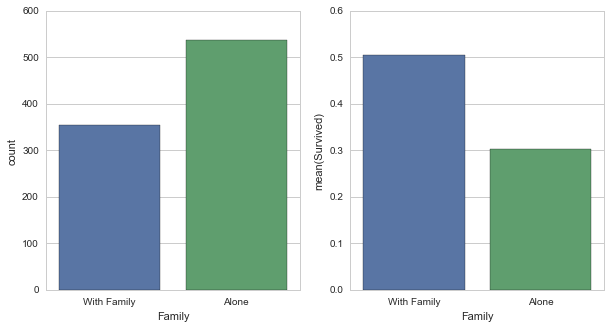

In [97]:
train_df = train_df.drop(['SibSp','Parch'], axis=1)
test_df    = test_df.drop(['SibSp','Parch'], axis=1)

# plot
fig, (axis1,axis2) = plt.subplots(1,2,sharex=True,figsize=(10,5))

# sns.factorplot('Family',data=titanic_df,kind='count',ax=axis1)
sns.countplot(x='Family', data=train_df, order=[1,0], ax=axis1)

# average of survived for those who had/didn't have any family member
family_perc = train_df[["Family", "Survived"]].groupby(['Family'],as_index=False).mean()
sns.barplot(x='Family', y='Survived', data=family_perc, order=[1,0], ax=axis2)

axis1.set_xticklabels(["With Family","Alone"], rotation=0)

In [98]:
def get_person(passenger):
    age,sex = passenger
    return 'child' if age < 16 else sex
    
train_df['Person'] = train_df[['Age','Sex']].apply(get_person,axis=1)
test_df['Person']    = test_df[['Age','Sex']].apply(get_person,axis=1)

# No need to use Sex column since we created Person column
train_df.drop(['Sex'],axis=1,inplace=True)
test_df.drop(['Sex'],axis=1,inplace=True)

In [99]:
person_dummies_titanic  = pd.get_dummies(train_df['Person'])
person_dummies_titanic.columns = ['Child','Female','Male']
person_dummies_titanic.drop(['Male'], axis=1, inplace=True)

person_dummies_test  = pd.get_dummies(test_df['Person'])
person_dummies_test.columns = ['Child','Female','Male']
person_dummies_test.drop(['Male'], axis=1, inplace=True)

train_df = train_df.join(person_dummies_titanic)
test_df    = test_df.join(person_dummies_test)


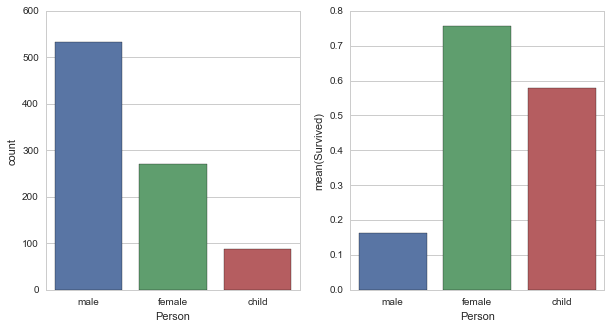

In [101]:
fig, (axis1,axis2) = plt.subplots(1,2,figsize=(10,5))

# sns.factorplot('Person',data=titanic_df,kind='count',ax=axis1)
sns.countplot(x='Person', data=train_df, ax=axis1)

# average of survived for each Person(male, female, or child)
person_perc = train_df[["Person", "Survived"]].groupby(['Person'],as_index=False).mean()
sns.barplot(x='Person', y='Survived', data=person_perc, ax=axis2, order=['male','female','child'])

train_df.drop(['Person'],axis=1,inplace=True)
test_df.drop(['Person'],axis=1,inplace=True)

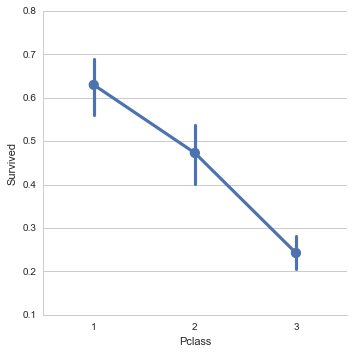

In [103]:
# Pclass

# sns.factorplot('Pclass',data=titanic_df,kind='count',order=[1,2,3])
sns.factorplot('Pclass','Survived',order=[1,2,3], data=train_df,size=5)

# create dummy variables for Pclass column, & drop 3rd class as it has the lowest average of survived passengers
pclass_dummies_titanic  = pd.get_dummies(train_df['Pclass'])
pclass_dummies_titanic.columns = ['Class_1','Class_2','Class_3']
pclass_dummies_titanic.drop(['Class_3'], axis=1, inplace=True)

pclass_dummies_test  = pd.get_dummies(test_df['Pclass'])
pclass_dummies_test.columns = ['Class_1','Class_2','Class_3']
pclass_dummies_test.drop(['Class_3'], axis=1, inplace=True)

train_df.drop(['Pclass'],axis=1,inplace=True)
test_df.drop(['Pclass'],axis=1,inplace=True)

train_df = train_df.join(pclass_dummies_titanic)
test_df    = test_df.join(pclass_dummies_test)

In [114]:
X_train = train_df.drop("Survived",axis=1)
Y_train = train_df["Survived"]
X_test  = test_df.drop("PassengerId",axis=1).copy()



In [106]:
# logistic regression

logreg = LogisticRegression()



In [107]:

logreg.fit(X_train, Y_train)




LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [109]:
logreg.score(X_train, Y_train)



0.80695847362514028

In [115]:
random_forest = RandomForestClassifier(n_estimators=100)

random_forest.fit(X_train, Y_train)

Y_pred = random_forest.predict(X_test)

random_forest.score(X_train, Y_train)

0.96520763187429859

In [116]:
submission = pd.DataFrame({
        "PassengerId": test_df["PassengerId"],
        "Survived": Y_pred
    })
submission.to_csv('titanic.csv', index=False)

In [117]:
os.getcwd()

'C:\\Users\\imtiaz.a.khan\\KagglePythonPractice'